# Objective

Create a classifier that will predict whether an iris belongs to the **Iris-setosa** class or not.

In [64]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [65]:
# Importing dataset 
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
# Exploring the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- Identify your independent variables x.
- Encode your dependent variable y such that ‘Iris-setosa' is encoded as 0, and 'Iris-versicolor' and 'Iris-virginica' are both encoded as 1.
(0 corresponds to the 'Iris-setosa' class, and 1 corresponds to the not-‘Iris-setosa' class.)

In [67]:

# Independent variables (features)
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Encode target: 0 = Iris-setosa, 1 = not Iris-setosa
y = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 1})

# Double-check the target variable distribution after encoding
y.value_counts()

Species
1    100
0     50
Name: count, dtype: int64

- Split the data into a training and test set.
- Use sklearn’s logistic regression function to fit a model and make predictions on the test set.

In [68]:
# Split into train and test sets
r_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r_seed)

# Initialize and fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

- Use sklearn to generate a confusion matrix, which compares the predicted labels to the actual labels (gold labels).

In [69]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[19,  0],
       [ 0, 26]])

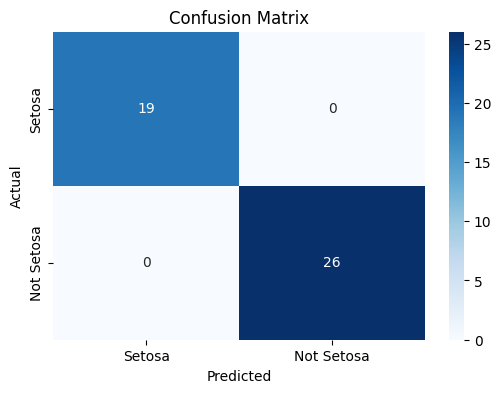

In [70]:

# Plot confusion matrix with labels
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Not Setosa'], yticklabels=['Setosa', 'Not Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Analyse the confusion matrix and provide a prediction, in a comment, whether the model is likely to have higher precision, higher recall, or similar precision and recall.

    - Answer: The model correctly identified all Setosa and all Not-Setosa cases.There are no false positives or false negatives observed in the confusion matrix. This means the model has equal and perfect precision and recall.

- Write your own code to calculate the accuracy, precision, and recall, and check whether your prediction was right.

In [71]:
# Manual calculations for accuracy, precision, recall

# Extract values from confusion matrix
TN, FP = conf_matrix[0]
FN, TP = conf_matrix[1]

# Accuracy: (TP + TN) / Total
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision: TP / (TP + FP)
precision = TP / (TP + FP)

# Recall: TP / (TP + FN)
recall = TP / (TP + FN)

print("Confusion matrix Accuracy:", accuracy)
print("Confusion matrix Precision:", precision)
print("Confusion matrix Recall:", recall)

Confusion matrix Accuracy: 1.0
Confusion matrix Precision: 1.0
Confusion matrix Recall: 1.0


## Optional 
Repeat this task but change it so that we only have all three categories `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica` corresponding to the numeric values 0, 1, and 2 respectively; this will now be a three-class problem. Observe how this changes the confusion matrix.

In [72]:
# Features
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Multi-class target encoding
y_multi = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Train-test split
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y_multi, test_size=0.3, random_state=42)

# Logistic regression for multi-class classification
log_reg_mc = LogisticRegression()
log_reg_mc.fit(X_train_mc, y_train_mc)

# Predictions
y_pred_mc = log_reg_mc.predict(X_test_mc)

# Confusion matrix
conf_matrix_mc = confusion_matrix(y_test_mc, y_pred_mc)
conf_matrix_mc

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

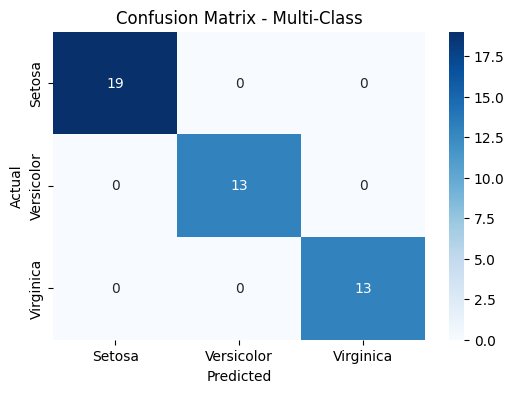

In [73]:
# Plot confusion matrix with labels
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_mc, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Multi-Class")
plt.show()